In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('listings_v2.xlsx', sheet_name='listings_v2')

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,date,ipc,usd_prices.usd_oficial,min_price_per_id.precio_arg_min,min_price_per_id.precio_usd_min,precio_usd,precio_arg_norm,precio_usd_norm
count,2.193720e+05,2.193720e+05,219372.000000,219372.000000,2.193720e+05,219372.000000,219372.000000,203986,203986.000000,219372.000000,219372.000000,219372.000000,219372,219372.000000,219372.000000,2.193720e+05,219372.000000,219372.000000,219372.000000,219372.000000
mean,5.276731e+17,1.789844e+08,-34.591077,-58.417483,5.750287e+04,4.831747,36.063682,2024-01-21 14:35:58.101046016,1.497910,18.214804,231.985117,14.131922,2024-06-09 18:00:00,167.974996,922.145833,5.036142e+04,60.914932,62.071372,131.691603,117.033267
min,1.150800e+04,1.342600e+04,-34.679230,-58.530890,2.600000e+02,1.000000,0.000000,2012-12-31 00:00:00,0.010000,1.000000,0.000000,0.000000,2023-12-26 00:00:00,100.000000,826.750000,2.600000e+02,0.314484,0.252182,0.222109,0.212648
25%,3.732304e+07,2.030900e+07,-34.601240,-58.436600,2.443750e+04,2.000000,6.000000,2023-12-16 00:00:00,0.450000,1.000000,148.000000,2.000000,2024-03-21 00:00:00,147.862511,871.875000,2.418200e+04,29.249471,26.515416,88.185395,78.949309
50%,7.194821e+17,1.054483e+08,-34.590066,-58.420700,3.309300e+04,3.000000,20.000000,2024-03-18 00:00:00,1.110000,3.000000,254.000000,9.000000,2024-06-12 12:00:00,175.838361,921.500000,3.270200e+04,39.554884,35.940793,100.000000,94.713649
75%,9.116138e+17,3.075966e+08,-34.581061,-58.393147,4.916625e+04,4.000000,46.000000,2024-07-04 00:00:00,2.170000,13.000000,339.000000,21.000000,2024-09-01 18:00:00,196.511852,971.250000,5.000000e+04,60.477774,53.646532,113.096759,100.422525
max,1.054467e+18,5.724827e+08,-34.534980,-58.355403,5.299833e+07,730.000000,961.000000,2024-11-30 00:00:00,23.410000,294.000000,365.000000,608.000000,2024-11-29 00:00:00,207.006972,1031.000000,1.776876e+07,21492.302389,53853.064110,318197.764423,272329.194344
std,4.287764e+17,1.821743e+08,0.017643,0.029580,6.216454e+05,16.828089,49.450880,NaN,1.391494,40.637028,110.128513,16.486760,NaN,33.311911,62.896756,1.958032e+05,236.834863,649.933756,2126.878326,1823.706325


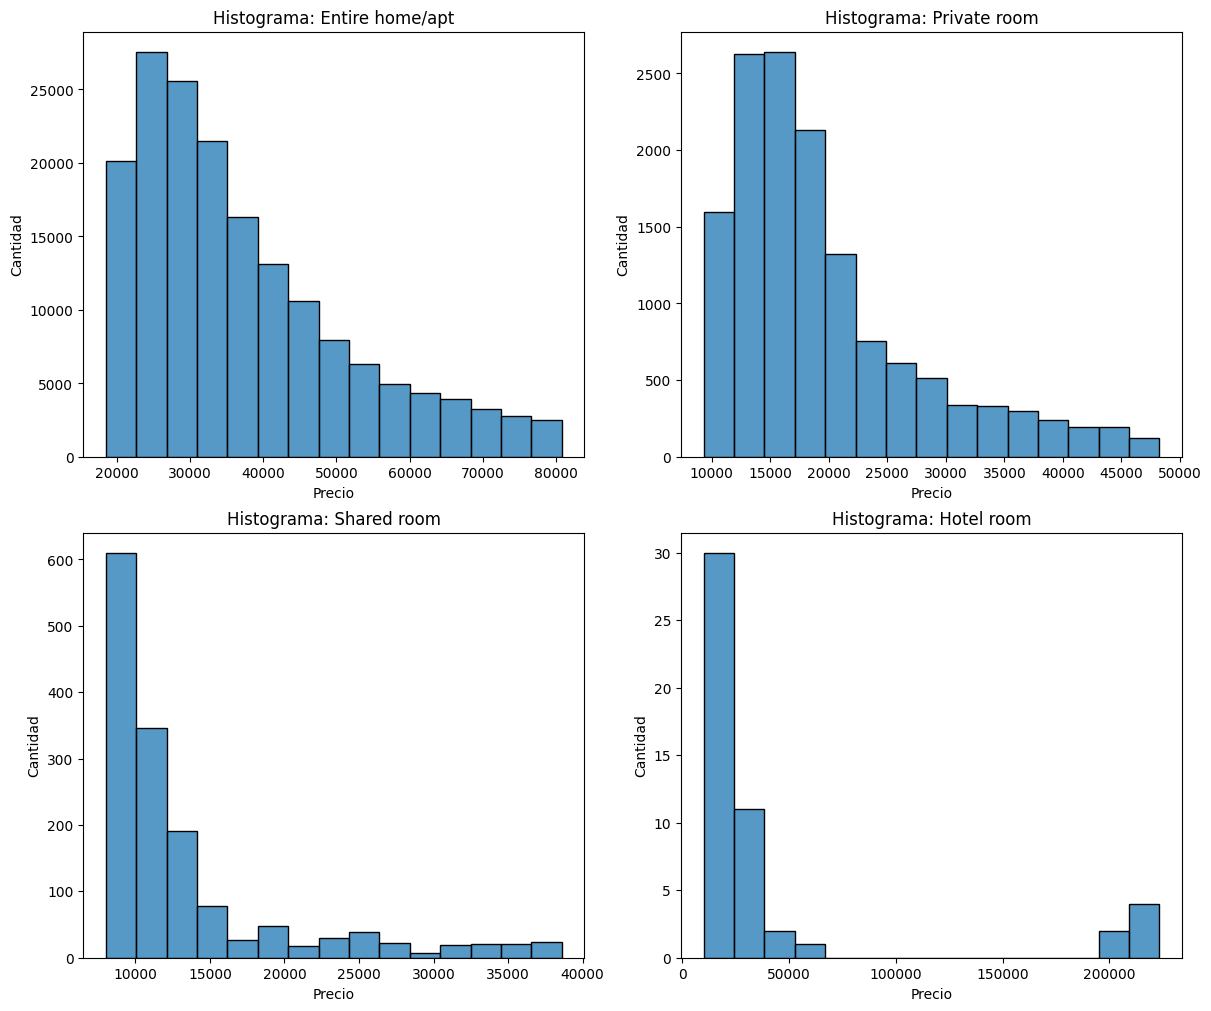

In [5]:
#quantiles _01 per room type
quantiles_01 = df.groupby('room_type')['price'].quantile(0.05)
quantiles_09 = df.groupby('room_type')['price'].quantile(0.9)

# filter df based on quantyle and room type
def filter_row(row):
    return row['price'] > quantiles_01[row['room_type']] and row['price'] < quantiles_09[row['room_type']]

#filtered_df = df[(df['price'] > quantile_01) & (df['price'] < quantile_09)]
filtered_df = df[df.apply(filter_row, axis=1)]

room_types = df['room_type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axes = axes.flatten()
for i, room_type in enumerate(room_types):
    sns.histplot(data=filtered_df[filtered_df['room_type'] == room_type], x='price', bins=15, kde=False, ax=axes[i])
    axes[i].set_title(f'Histograma: {room_type}')
    axes[i].set_xlabel('Precio')
    axes[i].set_ylabel('Cantidad')

for j in range(len(room_types), len(axes)):
    fig.delaxes(axes[j])

plt.show()

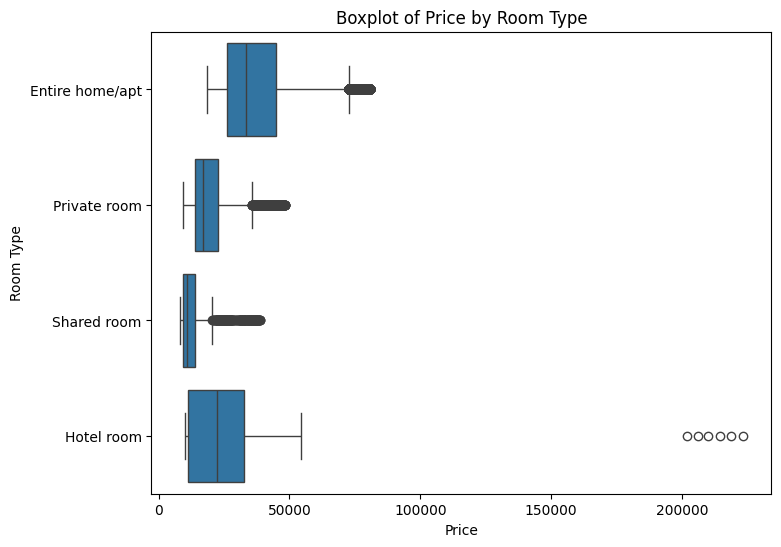

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x="price", y="room_type")
plt.xlabel("Price")
plt.ylabel("Room Type")
plt.title("Boxplot of Price by Room Type")
plt.show()

C:\Users\lucho\AppData\Local\Temp\ipykernel_23024\1110687236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values('date', inplace=True)


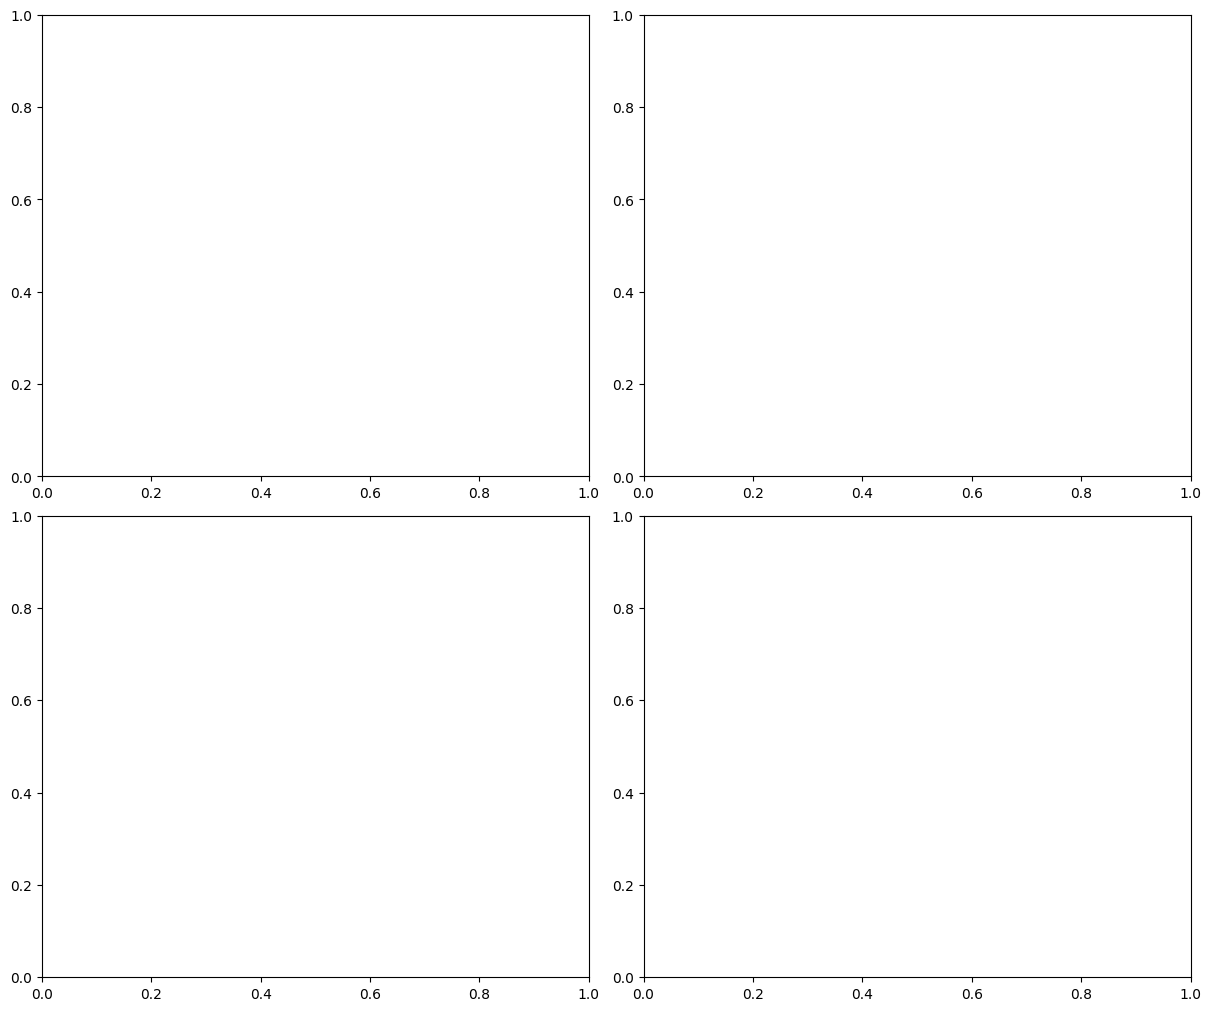

In [17]:
filtered_df.sort_values('date', inplace=True)

# average_usd_price_per_date = filtered_df.groupby('date')['precio_usd_norm'].mean()
# average_arg_price_per_date = filtered_df.groupby('date')['precio_arg_norm'].mean()
# average_ipc_per_date = filtered_df.groupby('date')['ipc'].mean()

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axes = axes.flatten()
for i, room_type in enumerate(room_types):
    dir(axes[i])
    sns.lineplot(data=filtered_df[filtered_df['room_type'] == room_type], x='date', y='precio_usd_norm', label='Precio en USD',ax=axes[i], linewidth=2)
    sns.lineplot(data=filtered_df[filtered_df['room_type'] == room_type], x='date', y='precio_arg_norm', label='Precio en ARS', ax=axes[i], linewidth=2)
    sns.lineplot(data=filtered_df[filtered_df['room_type'] == room_type], x='date', y='ipc', label='IPC', ax=axes[i], linewidth=2)
    axes[i].set_title(f'Evolución de los precios en USD y ARS vs IPC: {room_type}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Precio')

# for j in range(len(room_types), len(axes)):
#     fig.delaxes(axes[j])

# sns.lineplot(data=average_usd_price_per_date, label='Precio en USD')
# sns.lineplot(data=average_arg_price_per_date, label='Precio en ARS')
# sns.lineplot(data=average_ipc_per_date, label='IPC')

#sns.lineplot(data=filtered_df, x='date', y='precio_usd_norm', label='Precio en USD')
#sns.lineplot(data=filtered_df, x='date', y='precio_arg_norm', label='Precio en ARS')
#sns.lineplot(data=filtered_df, x='date', y='ipc', label='IPC')

# plt.xlabel('Fecha')
# plt.ylabel('Precio')
# plt.title('Evolución de los precios en USD y ARS vs IPC')

plt.show()

In [ ]:
# matrix on rows per neighbourhood on rows, room type on columns
